<div align="center"><h2>ЛАБОРАТОРНА РОБОТА № 1.</h2></div>
<div align="center"><h2>БАГАТОКРИТЕРІАЛЬНИЙ ВИБІР. ВИЗНАЧЕННЯ ОПТИМАЛЬНИХ</h2></div>
<div align="center"><h2>АЛЬТЕРНАТИВ ЗА ПАРЕТО ТА СЛЕЙТЕРОМ</h2></div>

**Мета роботи:** ознайомитись з поняттями оптимальності за Парето та за Слейтером при багатокритеріальному виборі.
    
**Варіант завдання: 11**

<img src="img/rk_11.jpg">

## Короткі теоретичні відомості

Задачу вибору, яка включає множину можливих рішень $X$ та векторний критерій $f$, зазвичай називають багатокритеріальною задачею або задачею багатокритеріальної оптимізації. Позначимо множину рішень, що обираються, як $C(X)$. Ця множина представляє собою рішення задачі вибору і до неї може входити будь-яка підмножина множини можливих рішень $X$.

_**Аксіома 1**. (Аксіома виключення рішень, що домінуються)_. Для будь-якої пари допустимих рішень $x^{'}, x^{''} \in X$, для яких має місце відношення $x^{'} \succ_x x^{''}$, виконується $x^{''} \notin C(X)$


_**Аксіома Парето.**_ Для всіх пар можливих рішень $x^{'}, x^{''} \in X$, для яких має місце нерівність $f(x^{'}) \geqslant f(x^{''})$, виконується співвідношення $x^{'} \succ_x x^{''}$.

Запис $f(x^{'}) \geqslant f(x^{''})$ означає, що компоненти першого вектора $f(x^{'})$ не менші за відповідні компоненти другого вектора $f(x^{''})$, і принаймні одна компонента першого вектора суворо більша за відповідну компоненту другого.

_**Визначення 1.**_ Рішення $x^{*} \in X$ називається оптимальним за Парето (парето-оптимальним), якщо не існує такого вирішення $x \in X$, для якого має місце нерівність $f(x) \geqslant f(x^{*})$. Всі парето-оптимальні рішення утворюють множину Парето, що позначається $P_f(X)$.

Тоюто, парето-оптимальне рішення - це таке можливе рішення, яке не може бути покращене (збільшене) по жодному з наявних критеріїв без погіршення (зменшення) по будь-якому хоча б одному іншому критерію. Рішенням, що входять до множити Парето, також називаються парето-ефективним.

_**Принцип Еджворта-Парето.**_ Якщо ОПР веде себе "розумно" (тобто виконуються умови "Аксіоми 1" та "Аксіоми Парето"), то рішення, що їм обираються, обов'язково повині бути парето-оптимальними $C(X) \subset P_f(X)$ 

В багатьох випадках пошук парето-оптимальних рішень є вкрай трудомісткою задачею. Тому введемо поняття "слабкого" парето-оптимального рішення або рішення, оптимального за Слейтером.

_**Визначення 2.**_ Рішення $x^{*} \in X$ називається оптимальним за Слейтером, якщо не існує такого вирішення $x \in X$, для якого має місце нерівність $f(x) > f(x^{*})$. Всі оптимальні рішення за Слейтером утворюють множину Слейтера, що позначається $S_f(X)$.

Запис $f(x^{'}) > f(x^{''})$ означає, що компоненти першого вектора $f(x^{'})$ суворо більші за відповідні компоненти другого вектора $f(x^{''})$.

Хоча рішення, оптимальні за Слейтером, менш цікаві за оптимальні за Парето, але в багатьох випадках при вирішенні задач багатокритеріальної оптимізації отримуються саме такі рішення.

Як при пошуку парето-оптимальних рішень, так і при пошуку рішень, оптимальних за Слейтером, необхідно враховувати узгодженість побажань ОПР. Тобто, ОПР зацікавлений в отриманні максимальних значень всіх компонентів векторного критерію $f$.

## Імпортуємо необхідні модулі

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib_venn import venn3, venn3_circles

In [547]:
import operator
from 

In [4]:
pd.set_option('display.max_columns', 60)

In [5]:
sns.set_style('darkgrid')
%matplotlib inline

## Завантажимо наші таблички та поглянемо на дані

In [6]:
PATH_TO_DATA = 'data/'

In [7]:
data1 = pd.read_excel(PATH_TO_DATA + 'data1.xlsx', index_col=0)

In [8]:
data1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,9,1,3,6,6,2,9,7,4,3,6,8,9,9,9,5,1,2,5
Q2,0,9,7,9,9,3,2,4,3,7,1,2,2,0,2,1,7,5,1,7


****

In [9]:
data2 = pd.read_excel(PATH_TO_DATA + 'data2.xlsx', index_col=0)

In [10]:
data2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,9,4,5,3,2,3,4,5,3,9,2,8,1,1,2,3,3,9,4
Q2,4,1,7,1,1,1,7,0,4,0,8,5,1,6,6,2,1,9,6,4


****

In [11]:
data3 = pd.read_excel(PATH_TO_DATA + 'data3.xlsx', index_col=0)

In [12]:
data3

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,3,8,1,2,7,6,1,7,7,8,3,4,7,8,7,5,5,4,9,1
Q2,8,0,8,1,0,2,2,9,7,5,6,4,6,3,7,9,7,4,9,1


****

## Сфорумуємо табличку з 60 альтернативами

In [13]:
data4 = pd.concat([data1,
                   data2.rename(columns={last_col: 'A'+str(int(last_col[1:])+20) for last_col in data2.columns}),
                   data3.rename(columns={last_col: 'A'+str(int(last_col[1:])+40) for last_col in data3.columns})
                  ], axis=1)

In [14]:
data4

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
Q1,7,9,1,3,6,6,2,9,7,4,3,6,8,9,9,9,5,1,2,5,7,9,4,5,3,2,3,4,5,3,9,2,8,1,1,2,3,3,9,4,3,8,1,2,7,6,1,7,7,8,3,4,7,8,7,5,5,4,9,1
Q2,0,9,7,9,9,3,2,4,3,7,1,2,2,0,2,1,7,5,1,7,4,1,7,1,1,1,7,0,4,0,8,5,1,6,6,2,1,9,6,4,8,0,8,1,0,2,2,9,7,5,6,4,6,3,7,9,7,4,9,1


## Реалізуємо критерії Парето та Слейтера

In [15]:
def pareto_metric(x1, x2):
    if not isinstance(x1, np.ndarray): x1 = np.array(x1)
    if not isinstance(x2, np.ndarray): x2 = np.array(x2)
    
    return True if (x1 >= x2).all() and (x1 > x2).any() else False

In [16]:
def slater_metric(x1, x2):
    if not isinstance(x1, np.ndarray): x1 = np.array(x1)
    if not isinstance(x2, np.ndarray): x2 = np.array(x2)
        
    return True if (x1 > x2).all() else False

## Реалізуємо пошук відповідних множин в наших даних

In [613]:
def find_next_j(j, N, skip_alternative_list):
    j += 1
    while j < N and skip_alternative_list[j]:
        j += 1
    return j

In [723]:
def compute_criterion(data, criterion=pareto_metric):
    assert isinstance(data, pd.DataFrame)
    
    N = data.shape[1]
    
    criterion_result = np.array([''] * N, dtype=np.dtype('U100'))
    skip_alternative_list = [False] * N
    
    # 1
    N -= 1
    i, j = 0, 1
    
    while True:
        # 2
        col_i = f'A{i+1}'
        col_j = f'A{j+1}'
        if criterion(data[col_i], data[col_j]) and not skip_alternative_list[j] and not skip_alternative_list[i]:
            criterion_result[criterion_result == col_j] = col_i
            criterion_result[j] = col_i
            
            # 3
            skip_alternative_list[j] = True
        # 5
        elif criterion(data[col_j], data[col_i]) and not skip_alternative_list[i] and not skip_alternative_list[j]:
            criterion_result[criterion_result == col_i] = col_j
            criterion_result[i] = col_j
            
            # 6
            skip_alternative_list[i] = True
        # 4
        if j < N:
            j = find_next_j(j, N, skip_alternative_list)
            continue
        # 7
        if i < N - 1:
            i += 1
            j = i + 1
        else:
            break
            
    return criterion_result

In [724]:
def compute_all_metrics(data):
    pareto_results = pd.DataFrame([compute_criterion(data, criterion=pareto_metric)],
                                  columns=[f'A{i+1}' for i in range(data.shape[1])],
                                  index=['Pareto'])
    slater_results = pd.DataFrame([compute_criterion(data, criterion=slater_metric)],
                                  columns=[f'A{i+1}' for i in range(data.shape[1])],
                                  index=['Slater'])
    
    return pd.concat([data, pareto_results, slater_results])

In [809]:
def plot_venn_diagram(data):
    venn3(subsets=[set(data.columns),
               set(data.loc['Pareto'][data.loc['Pareto'] == ''].index),
               set(data.loc['Slater'][data.loc['Slater'] == ''].index)],
      set_labels = ('X', 'Pareto', 'Slater'),
      set_colors=('r', 'g', 'b'));

In [810]:
def sort_list_by_key(data, keys=[0], reverses=[False]):
    assert len(keys) == len(reverses)
    
    for key, reverse in list(zip(keys, reverses)):
        data.sort(key=operator.itemgetter(key), reverse=reverse)
    return data

In [811]:
def count_of_distinct_points(d):
    d = np.array(sort_list_by_key(d, keys=[0, 1], reverses=[False, False]))
    cnt = 1
    for i in range(1, len(d)):
        if not (d[i-1] == d[i]).all():
            cnt += 1
    return cnt

In [812]:
def plot_decision_boundary(result_data):
    data = result_data.copy()
    dominant_criteria_pareto_columns = data.loc['Pareto'][data.loc['Pareto'] == ''].index
    dominant_criteria_slater_columns = data.loc['Slater'][data.loc['Slater'] == ''].index
    
    criteria_indexs = data.index[[i.startswith('Q') for i in data.index]]
    
    dominant_criteria_pareto = data.loc[criteria_indexs, dominant_criteria_pareto_columns]
    dominant_criteria_slater = data.loc[criteria_indexs, dominant_criteria_slater_columns]
    
    data = data.loc[criteria_indexs].values
    
    assert data.shape[0] == 2, 'You have more than 2D space!'
    
    X, y = data
    data_points = np.array(list(zip(*data)))
    
    pareto_x, pareto_y = np.array(list(zip(*sort_list_by_key(list(zip(*dominant_criteria_pareto.values)), keys=[0, 1], reverses=[True, False]))))
    slater_x, slater_y = np.array(list(zip(*sort_list_by_key(list(zip(*dominant_criteria_slater.values)), keys=[0, 1], reverses=[True, False]))))
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    ax1, ax2 = ax.ravel()
    
    
    
    ax1.scatter(X, y, label='Data point')
    
    cnt = count_of_distinct_points(list(zip(pareto_x, pareto_y)))
    if pareto_x.shape[0] == 1 or cnt == 1:
        if cnt == 1 and pareto_x.shape[0] != 1:
            text = f'{pareto_x.shape[0]} Pareto points are at one place'
        else:
            text = 'One Pareto point'
        circle_rad= 1
        ax1.annotate(text, xy=[pareto_x[0], pareto_y[0]], xytext=(-120, 40),
            textcoords='offset points',
            color='red', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='red', shrinkB=circle_rad * 1.2))
    else:
        ax1.plot(pareto_x, pareto_y, color='red', alpha=0.5, label='Pareto decision boundary')
        
    for i, point in enumerate(data_points):
        ax1.annotate(f'A{i+1}', (point[0]+0.1, point[1]+0.1))
        
        

    ax2.scatter(X, y, label='Data point')
    
    cnt = count_of_distinct_points(list(zip(slater_x, slater_y)))
    if slater_x.shape[0] == 1 or cnt == 1:
        if cnt == 1 and slater_x.shape[0] != 1:
            text = f'{slater_x.shape[0]} Slater points are at one place'
        else:
            text = 'One Slater point'
        circle_rad= 1
        ax2.annotate(text, xy=[slater_x[0], slater_y[0]], xytext=(-120, 40),
            textcoords='offset points',
            color='red', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='red', shrinkB=circle_rad * 1.2))
    else:
        ax2.plot(slater_x, slater_y, color='red', alpha=0.5, label='Slater decision boundary')
        
    for i, point in enumerate(data_points):
        ax2.annotate(f'A{i+1}', (point[0]+0.1, point[1]+0.1))

        
        
    ax1.set_title(u'Pareto decision boundary');
    ax1.legend();
    ax2.set_title(u'Slater decision boundary');
    ax2.legend();

## Поглянемо на результат для вибірки 1

In [813]:
result1 = compute_all_metrics(data1)
result1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,9,1,3,6,6,2,9,7,4,3,6,8,9,9,9,5,1,2,5
Q2,0,9,7,9,9,3,2,4,3,7,1,2,2,0,2,1,7,5,1,7
Pareto,A2,,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2
Slater,A2,,A2,,,A2,A2,,A2,A2,A2,A2,A2,,,,A2,A2,A2,A2


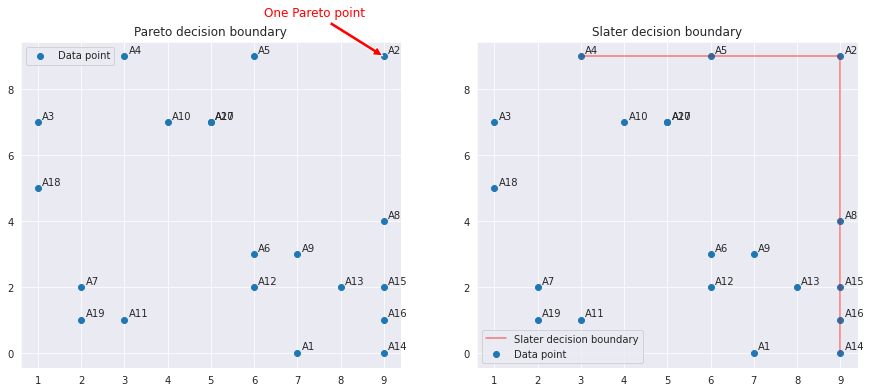

In [814]:
plot_decision_boundary(result1)

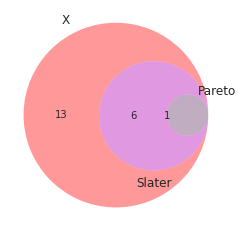

In [815]:
plot_venn_diagram(result1)

## Поглянемо на результат для вибірки 2

In [816]:
result2 = compute_all_metrics(data2)
result2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,7,9,4,5,3,2,3,4,5,3,9,2,8,1,1,2,3,3,9,4
Q2,4,1,7,1,1,1,7,0,4,0,8,5,1,6,6,2,1,9,6,4
Pareto,A11,A11,A11,A11,A11,A11,A11,A11,A11,A11,,A11,A11,A11,A11,A11,A11,,A11,A11
Slater,A11,,A11,A11,A11,A11,A11,A11,A11,A11,,A11,A11,A11,A11,A11,A11,,,A11


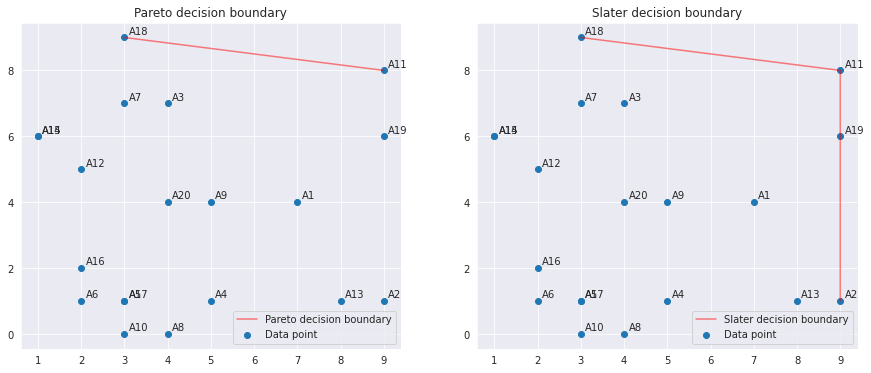

In [817]:
plot_decision_boundary(result2)

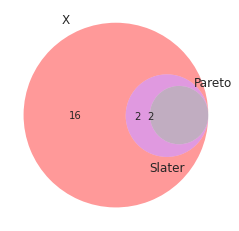

In [818]:
plot_venn_diagram(result2)

## Поглянемо на результат для вибірки 3

In [819]:
result3 = compute_all_metrics(data3)
result3

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Q1,3,8,1,2,7,6,1,7,7,8,3,4,7,8,7,5,5,4,9,1
Q2,8,0,8,1,0,2,2,9,7,5,6,4,6,3,7,9,7,4,9,1
Pareto,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,A19,,A19
Slater,A8,A19,A8,A8,A19,A8,A8,,A19,A19,A8,A8,A19,A19,A19,,A8,A8,,A8


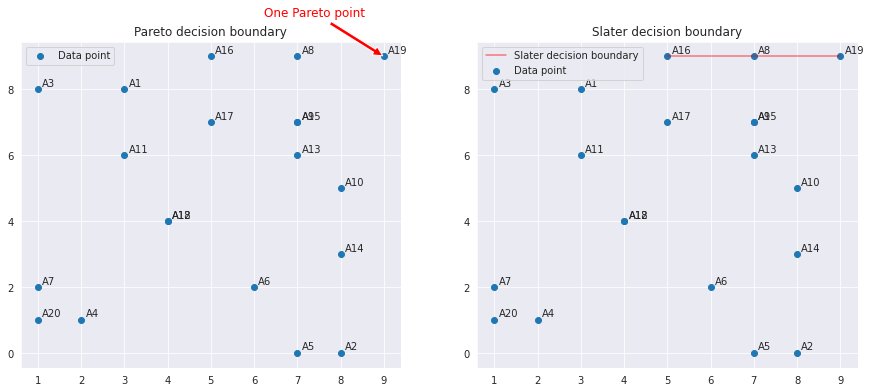

In [820]:
plot_decision_boundary(result3)

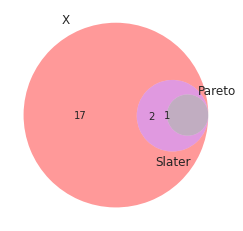

In [821]:
plot_venn_diagram(result3)

## Поглянемо на результат для вибірки 4

In [822]:
result4 = compute_all_metrics(data4)
result4

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
Q1,7,9,1,3,6,6,2,9,7,4,3,6,8,9,9,9,5,1,2,5,7,9,4,5,3,2,3,4,5,3,9,2,8,1,1,2,3,3,9,4,3,8,1,2,7,6,1,7,7,8,3,4,7,8,7,5,5,4,9,1
Q2,0,9,7,9,9,3,2,4,3,7,1,2,2,0,2,1,7,5,1,7,4,1,7,1,1,1,7,0,4,0,8,5,1,6,6,2,1,9,6,4,8,0,8,1,0,2,2,9,7,5,6,4,6,3,7,9,7,4,9,1
Pareto,A2,,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,A2,,A2
Slater,A2,,A2,,,A2,A2,,A2,A2,A2,A2,A2,,,,A2,A2,A2,A2,A2,,A2,A2,A2,A2,A2,A2,A2,A2,,A2,A2,A2,A2,A2,A2,,,A2,A2,A2,A2,A2,A2,A2,A2,,A2,A2,A2,A2,A2,A2,A2,,A2,A2,,A2


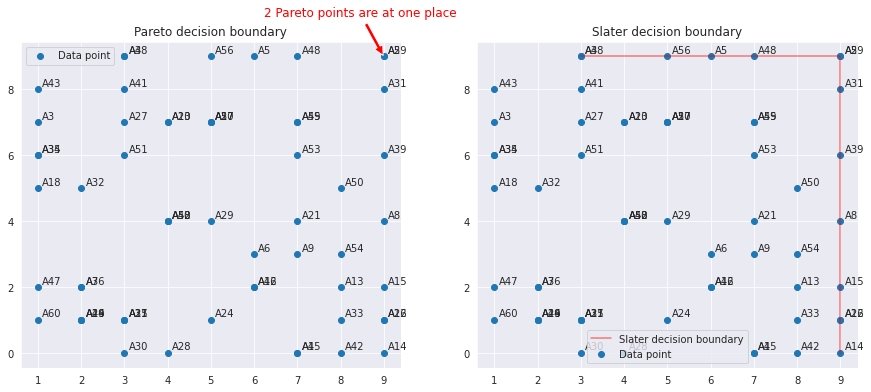

In [823]:
plot_decision_boundary(result4)

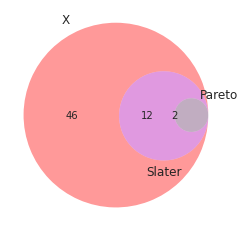

In [824]:
plot_venn_diagram(result4)

## Висновок

В даній лабораторній роботі ми ознайомились з поняттями оптимальності за Парето та за Слейтером при багокритеріальному виборі. Також ми побудували алгоритм знаходження задаких множин та дослідили 4 набори даних. 

Алгоритм є універсальним та приймає на вхід функцію критерію домінування.

В першому наборі даних до множити $P_f(X)$ потрапила лише одна альтерантива $A2(9, 9)$, оскільки значення її критеріїв набували максимально можливих значень на заданому наборі даних. До множини $S_f(X)$ потрапило вже більше альтернатив. Якщо поглянути на графік з відображеними границями Парето та Слейтера, то побачимо, що до множини Слейтера потрапили ті точки, значення хоча б одного критерія з яких набувало максимально можливого значення (в даному випадку це число 9). Також, мною було побудовано графік відношення між множими, який ще раз нам доводить наступне твердження: $P_f(X) \subset S_f(X) \subset X$. 

З набором даних 3 ситуація така сама, а в наборі даних 2 було вже декілька парето-оптимальних рішень, тому ми змогли побудувати відповідну границю.

Набір даних 4 є поєднанням перших трьох наборів. Відповідно, в нас є 60 альтернатив, 2 з яких мають максимально можливі значення критеріїв, з тих, які він може набувати. Відповідно, очікувалось, що ми будемо мати 2 точки Парето, які будуть співпадати. Дані очікування підтвердились, також можемо бачити відповідних графік. З множиною Слейтера ситуація така сама, як і для інших вибірок.